<a href="https://colab.research.google.com/github/vijaylokith/Customer-Churn-Prediction/blob/main/Customer_churn_prediction_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Customer Churn Prediction : E - Commerce*** 

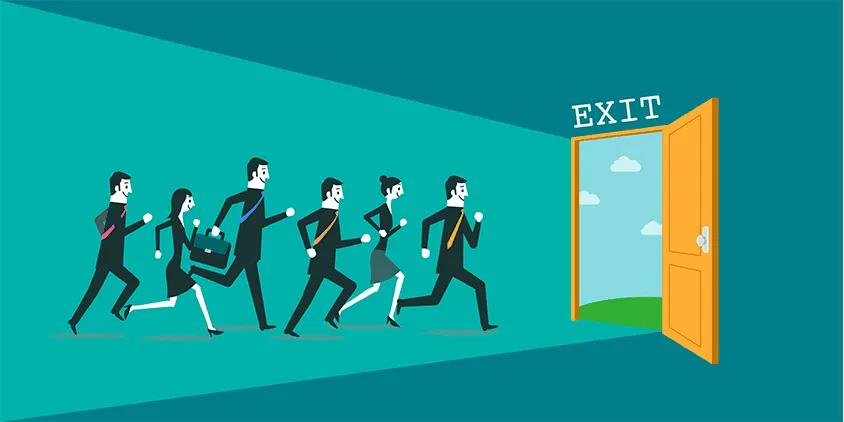

## **1) Business Problem Statement**

### **1.1) Introduction**


> When customers or subscribers stop doing business with a company or service, it is known as customer churn.


> In e-commerce, customers have a range of service providers to pick from and can actively switch between them.
In this fiercely competitive sector, the e-commerce industry has an annual churn rate of 3.35 percent to 12.71 percent.

> Although it is very hard to keep track of every individual, if businesses can identify the consumers who may leave, they may concentrate their marketing efforts on them, which will have a significant positive effect on their bottom line.

> Hence the problem of customer churn prediction becomes an integral part of a business development


## **2) Business Objective & Constrains**

### **2.1) Problem  Statement**



> We are tasked to build a model to predict customer churn.



### **2.2) Business Constrains**

> Low Latency Requirment (Low)

> Cost of Mis-classification (Medium - High)

> Interpretability (Medium - High)

## **3) Mapping a Real World to a Machine Learning Problem**

### **3.1) Type of Machine Learning Problem**

> This is a Binary Classification Problem (churn or not churn).

### **3.2) Performance Metric**

> Log-Loss (KPI - Key Performance Indicator)**

> Confusion Matrix (Secondary Mertic - to understand our model behaviour)*

> Percentage of Mis-classified Points (1-Accuracy)

## **4) Data Loading**

### **4.1) Importing the Necessary Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.feature_selection import f_classif, SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

### **4.2) Reading the Data**

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Customer churn prediction : E - Commerce/E Commerce dataframe.xlsx")
print(df.shape)
df.head()

(5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


We can clearly see some features(Tenure) have NaN(not a number == NULL) value, we can treat it in the next step(data cleaning)

In [5]:
feature_description = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Customer churn prediction : E - Commerce/feature description.xlsx",header=1)
feature_description.drop("Unnamed: 0",axis=1)

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


## **5) Data Celaning**

In [6]:
# Checking for duplicates in the data

print(f"Number of duplicate row's in the dataset: {df.duplicated().sum()}")

Number of duplicate row's in the dataset: 0


In [7]:
# Checking for NULL values

df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

We can clearly see that 7 out of 20 features have missing values.

In [8]:
missing_values = df.columns[df.isnull().any()].tolist()
missing_values

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [9]:
df[missing_values].head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0
5,0.0,22.0,3.0,22.0,4.0,6.0,7.0
6,NaN,11.0,2.0,14.0,0.0,1.0,0.0
7,NaN,6.0,3.0,16.0,2.0,2.0,0.0
8,13.0,9.0,NaN,14.0,0.0,1.0,2.0
9,NaN,31.0,2.0,12.0,1.0,1.0,1.0


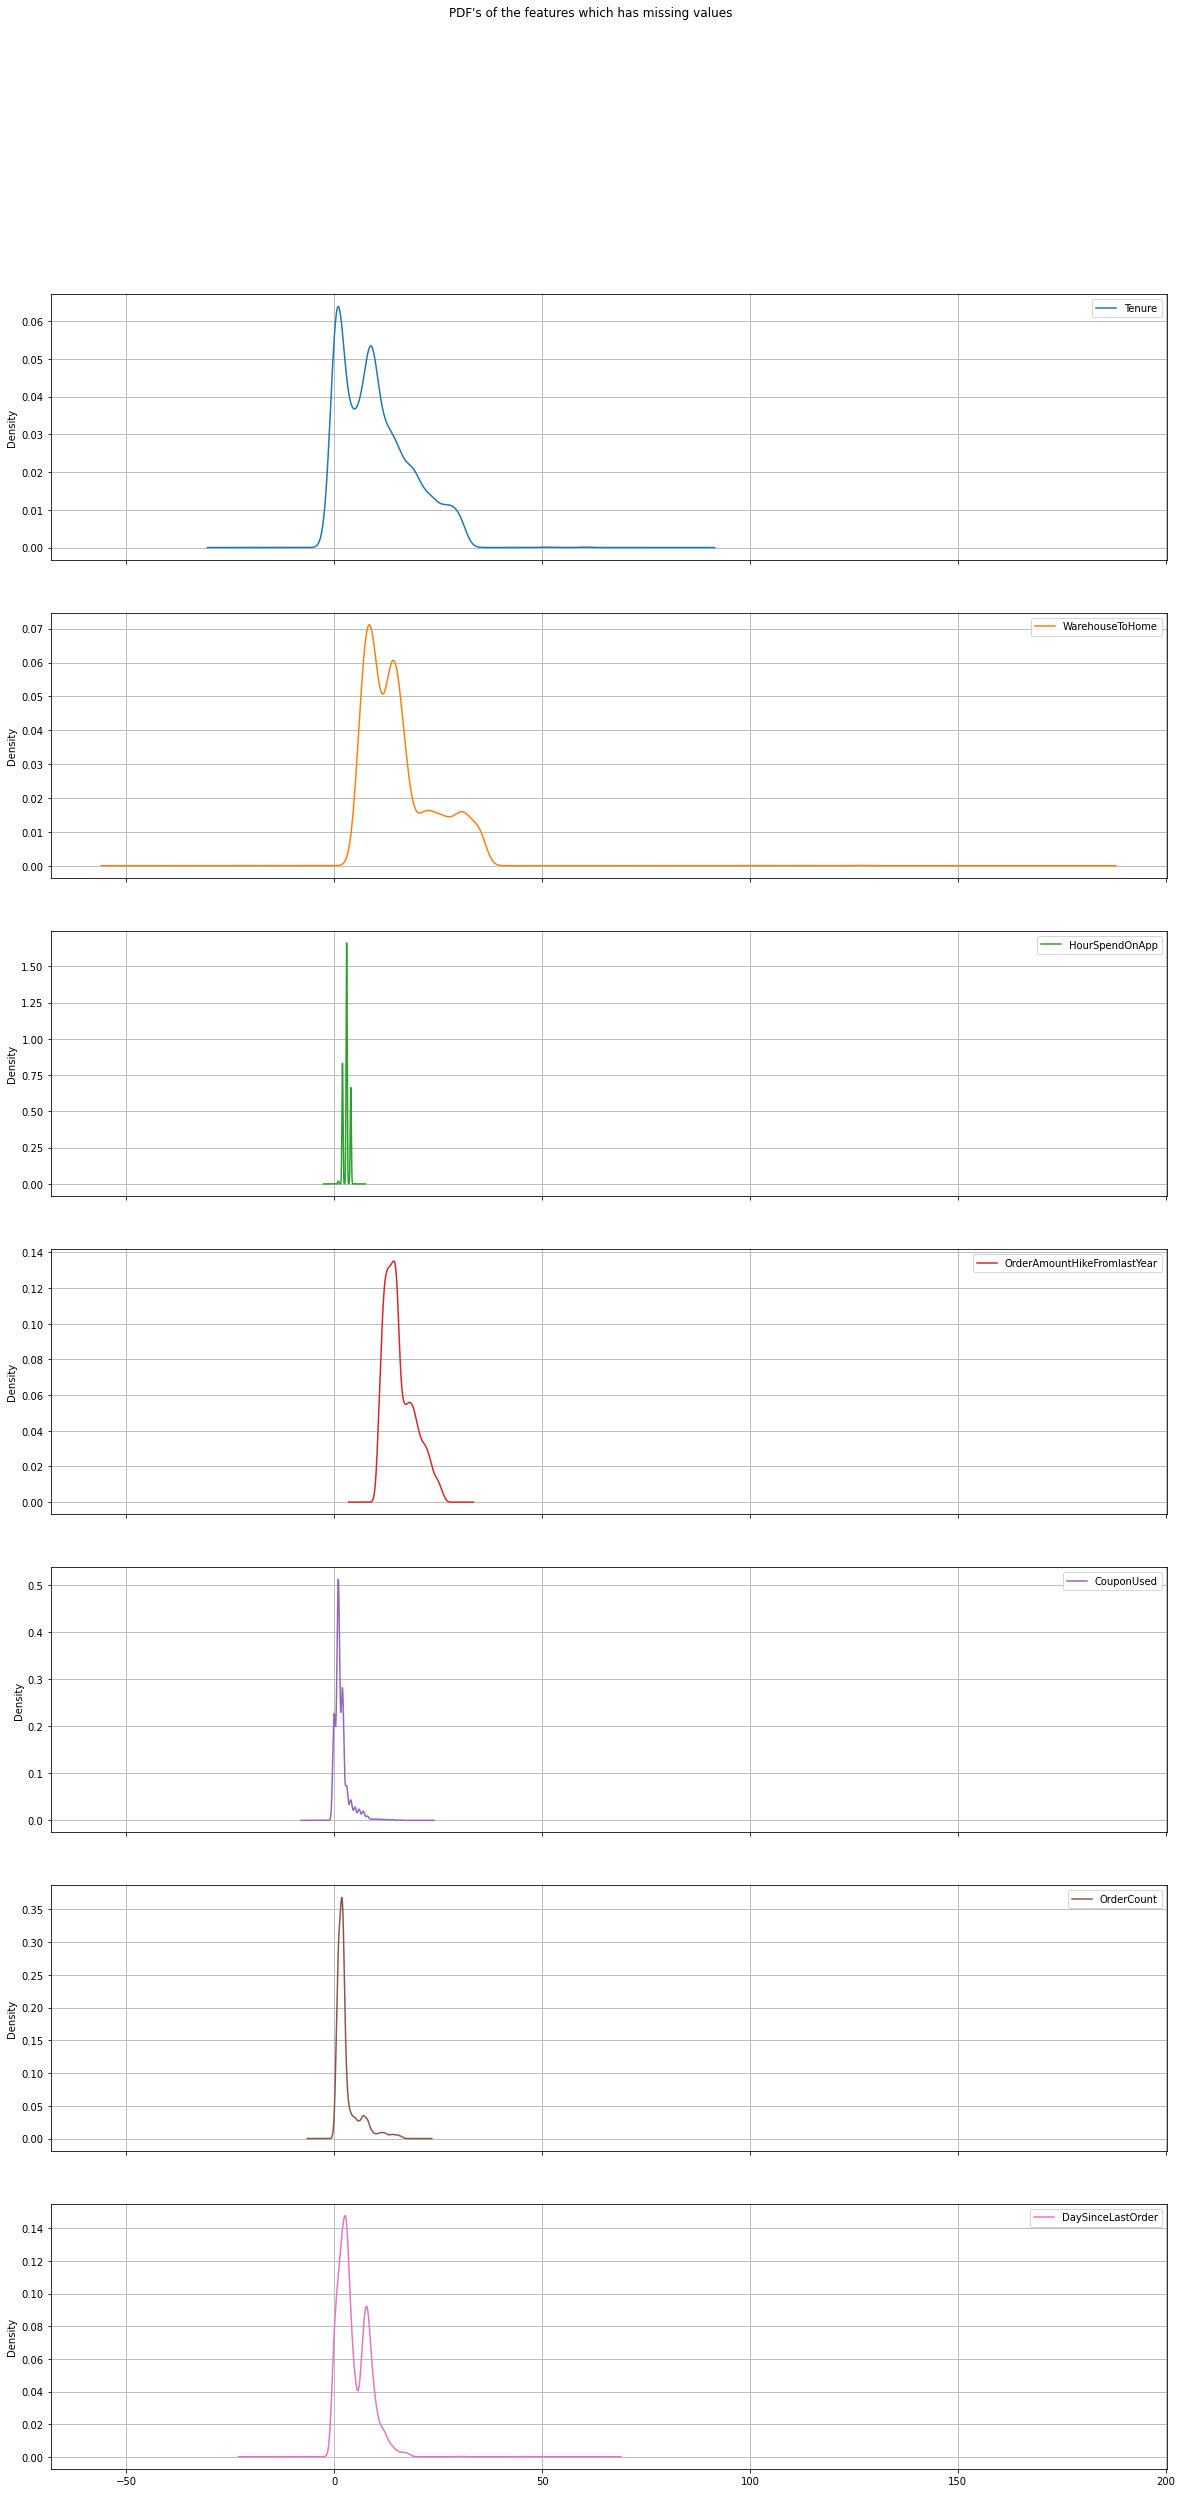

In [52]:
# Before handling the missing values we will look at the distribution of the feature which has missing values

df[missing_values].plot.kde(subplots=True,grid=True,title="PDF's of the features which has missing values", figsize=(20,40))
plt.show()

> From the above plot, we can clearly see that out of the 7 features almost all of them are slightly or medium-right skewed.

> In right skewed distributions typically (mean > median > mode)

> For features like {"Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"} (almost normally distributed) we can replace the missing value's with the median of that feature.

> Remaining feature is {"DaySinceLastOrder"}, it has two peaks which are skewed so we can use model based imputation instead of a normal mean/median based imputation. In model based imputation we can use a simple model like K-NN to predict the missing values.

In [11]:
# Replacing the missing values of {"Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"} with their median value

normal_missing_features = ["Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"]
for i in normal_missing_features:
  df[i].fillna(df[i].median(), inplace=True)

df[missing_values].head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,9.0,8.0,3.0,15.0,0.0,1.0,0.0
2,9.0,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,3.0,11.0,1.0,1.0,3.0
5,0.0,22.0,3.0,22.0,4.0,6.0,7.0
6,9.0,11.0,2.0,14.0,0.0,1.0,0.0
7,9.0,6.0,3.0,16.0,2.0,2.0,0.0
8,13.0,9.0,3.0,14.0,0.0,1.0,2.0
9,9.0,31.0,2.0,12.0,1.0,1.0,1.0


In [12]:
# Model based imputation (K-NN with default K)

skewed_missing_features = []

df1 = df.copy()

In [13]:
df1 = df1.drop(["CustomerID","PreferredLoginDevice","PreferredPaymentMode",	"Gender",	"PreferedOrderCat","MaritalStatus"],axis=1)

In [14]:
dslo_missing = df1["DaySinceLastOrder"].isnull().values
dslo_missing_list = df1["DaySinceLastOrder"].iloc[dslo_missing].index
dslo_missing_list

Int64Index([  88,   97,  126,  146,  151,  182,  188,  216,  227,  295,
            ...
            5544, 5545, 5554, 5556, 5574, 5591, 5608, 5610, 5623, 5626],
           dtype='int64', length=307)

In [15]:
df2 = df1.copy()
df2 = df2.drop(labels=dslo_missing_list)
print(df2.shape)

df3 = df1.loc[dslo_missing_list]
df3.shape

(5323, 14)


(307, 14)

In [16]:
df2

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,3,12.0,2.0,5,3,2,0,19.0,2.0,2.0,1.0,154.66
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90


In [17]:
df2_x = df2.drop("DaySinceLastOrder",axis=1)
df2_y = df2["DaySinceLastOrder"]

df3_x = df3.drop("DaySinceLastOrder",axis=1)

In [18]:
model_imputation = KNeighborsRegressor()
model_imputation.fit(df2_x,df2_y)
result = model_imputation.predict(df3_x)

In [19]:
result = result.round()
result

array([ 4.,  9.,  6.,  7.,  5.,  4.,  9.,  8.,  5.,  4.,  4.,  3.,  5.,
        8.,  5., 10., 12.,  3.,  4.,  8.,  5.,  8.,  2.,  3., 15.,  5.,
        8.,  6.,  7.,  4., 12.,  2.,  5.,  8.,  7.,  7., 10., 12.,  4.,
        9.,  6.,  7.,  4.,  4.,  8.,  8.,  5.,  2.,  4.,  3.,  3.,  5.,
        8.,  5., 10., 10.,  3.,  5.,  8.,  5., 11.,  2.,  3., 15.,  5.,
        8.,  7.,  7.,  4., 12.,  2.,  5.,  8.,  8.,  8., 10.,  6.,  7.,
        2.,  8.,  7.,  8.,  6.,  7., 10.,  5.,  6., 12., 11.,  7.,  9.,
       10., 10.,  8., 12.,  8.,  6.,  7.,  6.,  5.,  6.,  9.,  8.,  8.,
        8., 12.,  6.,  8., 11.,  5.,  5., 12.,  3.,  7.,  8.,  6., 10.,
       12.,  8.,  7.,  6.,  7.,  6.,  8.,  7.,  3.,  6., 14.,  8., 12.,
       10.,  2.,  7.,  9.,  7.,  6., 12., 11.,  4.,  5., 12.,  8.,  5.,
        7.,  9.,  2.,  4.,  5.,  4.,  6., 11., 12.,  9., 16.,  5.,  4.,
        9.,  6.,  9.,  9.,  8.,  7.,  6.,  5.,  4.,  4.,  5., 12.,  7.,
        7., 13.,  6.,  6., 10.,  9., 13., 11., 12.,  3.,  5.,  8

In [20]:
for i,j in enumerate(dslo_missing_list):
  df["DaySinceLastOrder"].loc[j] = result[i]

df.head(11)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [21]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

> As we can see all the null values are replaced either by median or by model based imputation (typically this model based imputation gives better results than a simple mean/median based imputation)

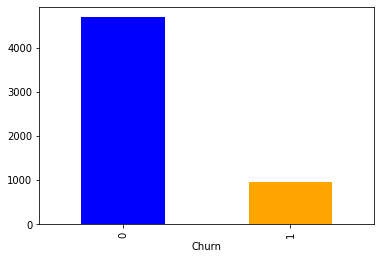

In [51]:
# Check for data balance

df.groupby("Churn")["CustomerID"].count().plot.bar(color=['blue','orange'])
plt.show()

In [23]:
unchurn_count = (df.groupby("Churn")["CustomerID"].count()[0] / df.shape[0])*100
print(f"In the whole data set {np.round_(unchurn_count)} % of the points belong to Unchurn and the rest {np.round_(100-unchurn_count)} % of the points belong to Churn")

In the whole data set 83.0 % of the points belong to Unchurn and the rest 17.0 % of the points belong to Churn


> We can conclude that our data is highly imbalanced. But this is common in problems like cancer prediction, fraud detection, customer churn prediction, etc. In these types of problems mostly the affected class will be smaller than the non-affected class.

> So should we balance the data or not? 

> This is a debatable topic, sometimes syntactically balanced data will perform better and sometimes the imbalanced data will perform better. So as a part of this project, we will try both and pick the one which has good performance and generalization

We will balance the data in the modelling preparation stage

## **6) Exploratory Data Analysis**

### **6.1) Basic EDA**

In [24]:
df.shape

(5630, 20)

In [25]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

> Before starting the Avanced Analysis we should diferenciate the numerical and categorical features. So we can run a deep, seperate feature type specific analysis.

In [28]:
for i in df.columns:
  print(f"{i} -> {df[i].unique()} -> {len(df[i].unique())}")
  print()

CustomerID -> [50001 50002 50003 ... 55628 55629 55630] -> 5630

Churn -> [1 0] -> 2

Tenure -> [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.] -> 36

PreferredLoginDevice -> ['Mobile Phone' 'Phone' 'Computer'] -> 3

CityTier -> [3 1 2] -> 3

WarehouseToHome -> [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.] -> 34

PreferredPaymentMode -> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] -> 7

Gender -> ['Female' 'Male'] -> 2

HourSpendOnApp -> [3. 2. 1. 0. 4. 5.] -> 6

NumberOfDeviceRegistered -> [3 4 5 2 1 6] -> 6

PreferedOrderCat -> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] -> 6

SatisfactionScore -> [2 3 5 4 1] -> 5

MaritalStatus -> ['Single' 'Divorced' 'Married'] -> 3

NumberOfAddress -> [ 9  7  6  

In [29]:
numerical_features = []
categorical_features = []

for i in df.columns:
  if len(df[i].unique()) <= 3 or df[i].dtypes == object:
    categorical_features.append(i)
  else:
    numerical_features.append(i)

print(f"Out of 20 features we have {len(categorical_features)} categorical feature which are:")
print(categorical_features)
print()
print()
print(f"Out of 20 features we have {len(numerical_features)} numerical feature which are:")
print(numerical_features)

Out of 20 features we have 8 categorical feature which are:
['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']


Out of 20 features we have 12 numerical feature which are:
['CustomerID', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


> All features with fewer than three unique variables and features with "object" as a datatype have been considered as categorical features. 

> And the remaining features are considered as numerical features.

### **6.2) Train - Cross Validation - Test Split**

> We will be splitting the data into three parts.


1.   Train
2.   Cross Validation
3.   Test

> We will use train data to train the model,cross validation data to do data analysis and hyperparameter tunning and finally the test data to measure the model performance.

> Train - Cross Validation - Test ratio -> (64:16:20) respectively:.




In [30]:
target = df["Churn"]

combain_df,test_df,y_combain,y_test = train_test_split(df,target,test_size=0.2,random_state=11,stratify=target)
train_df,cv_df,y_train,y_cv = train_test_split(combain_df,y_combain,test_size=0.2,random_state=11,stratify=y_combain)

In [31]:
print(f"train_df.shape = {train_df.shape} test_df.shape= {test_df.shape} cv_df.shape= {cv_df.shape}  y_train.shape= {y_train.shape} y_test.shape= {y_test.shape} y_cv.shape= {y_cv.shape}")

train_df.shape = (3603, 20) test_df.shape= (1126, 20) cv_df.shape= (901, 20)  y_train.shape= (3603,) y_test.shape= (1126,) y_cv.shape= (901,)


In [32]:
train_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2153,52154,0,2.0,Phone,1,14.0,Debit Card,Female,3.0,3,Mobile,1,Married,5,0,22.0,1.0,1.0,7.0,125.14
134,50135,1,0.0,Computer,1,35.0,CC,Male,3.0,4,Mobile,4,Single,1,0,11.0,1.0,1.0,4.0,134.79
1508,51509,0,30.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,1,Fashion,1,Married,4,1,16.0,1.0,1.0,4.0,194.39
596,50597,0,23.0,Mobile Phone,1,30.0,Debit Card,Male,3.0,3,Grocery,3,Divorced,4,1,18.0,0.0,2.0,5.0,239.73
5163,55164,0,1.0,Mobile Phone,1,8.0,COD,Male,3.0,4,Mobile Phone,1,Married,6,0,12.0,1.0,2.0,3.0,157.29


### **6.3) Distribution Check**

> As we have not yet balanced our imbalance data, it is important to determine whether the distributions of the train and test data are similar (based on target variable)


> No model will perform better since train and test data come from different distributions (This is one of the important steps when we do a time-based splitting as there is a chance that distribution might change by time)



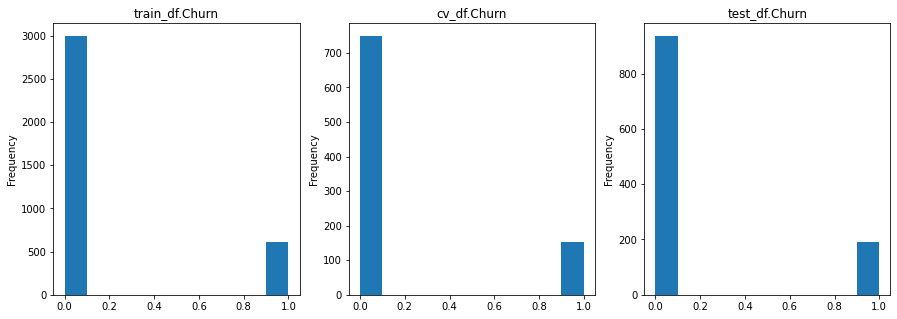

In [50]:
plt.subplot(1,3,1)
train_df["Churn"].plot.hist(figsize=(15,5), title= "train_df.Churn")
plt.subplot(1,3,2)
cv_df["Churn"].plot.hist(title= "cv_df.Churn")
plt.subplot(1,3,3)
test_df["Churn"].plot.hist(title= "test_df.Churn")
plt.show()

> We can see from the frequencies that all three train, cv and test almost have similar distribution (don't get deceived by the plot look at the scale(frequencies))

### **6.4) Random Model**

> Random model is a model which generates the class probabilities randomly, and based on that generated class probabilities we will compute the log loss(KPI for this project) of the random model.

> We can use this random model as a benchmark, features which does not pass this benchmark will not be used in the final modelling.

In [34]:
# Generate random probabilities (i.e random number between 0-1) for 2 classes, such that they sum to 1.
np.random.seed(250)
random_test_prob = np.zeros((y_cv.shape[0],2))
for i in range(y_cv.shape[0]):
  class_prob = np.random.rand(1,2)
  random_test_prob[i] = ((class_prob/sum(sum(class_prob)))[0])
print(random_test_prob.shape)
random_test_prob

(901, 2)


array([[0.44062455, 0.55937545],
       [0.36614016, 0.63385984],
       [0.47318912, 0.52681088],
       ...,
       [0.3121701 , 0.6878299 ],
       [0.10446662, 0.89553338],
       [0.04124031, 0.95875969]])

In [35]:
# Performance of the random model
print(f" The random model has a log loss of {log_loss(y_cv,random_test_prob)} in the cross validate data set")

 The random model has a log loss of 0.9104425262323852 in the cross validate data set


### **6.5) Hypothesis testing**

> We will do a bunch of hypothesis testing to identify the correlation between 

> 1. Numerical features -> pearson correlation, spearman correlation
> 2. Numerical feature & Target variable -> ANOVA Test
> 3. Categorical feature & Target variable -> Chi-2



**6.5.1) Feature - Feature Correlation (Numberical features)**

***6.5.1.1) Pearson Correlation***

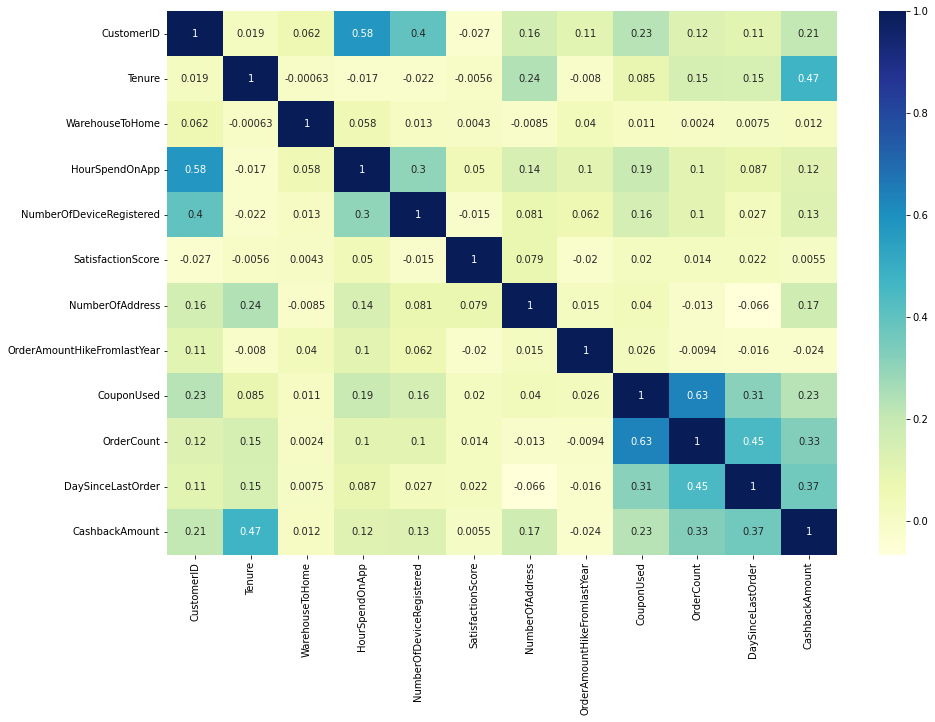

In [49]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_df[numerical_features].corr(method='pearson'),cmap="YlGnBu",annot=True)
plt.show()

***6.5.1.2) Spearman Correlation***

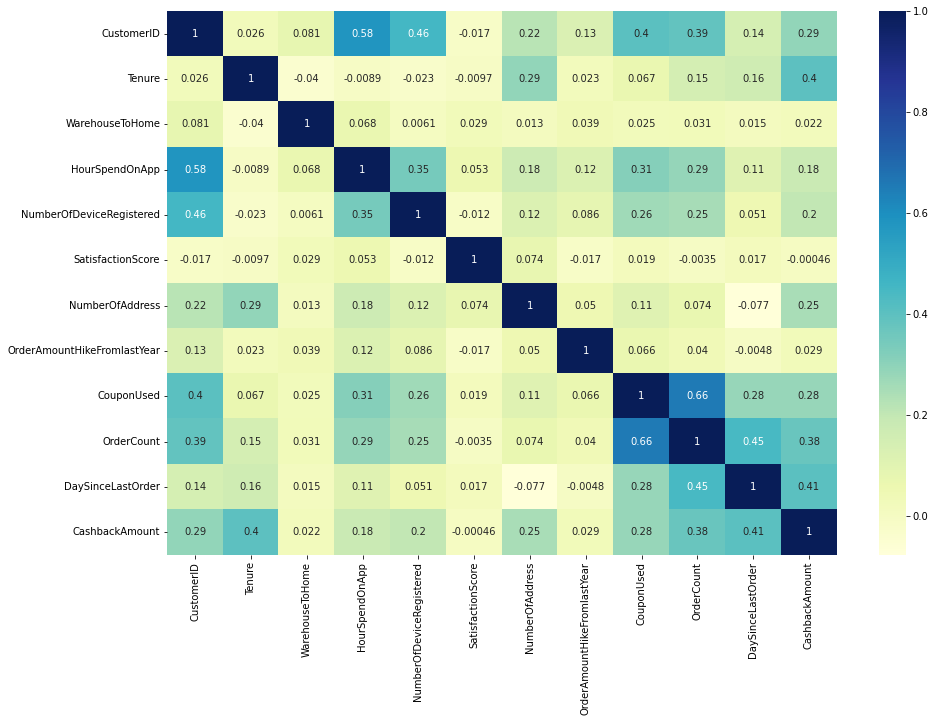

In [48]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_df[numerical_features].corr(method='spearman'),cmap="YlGnBu",annot=True)
plt.show()

> we can clearly see that there is no two features which has a correlation greater than 0.8 (high positive correlation) or less than -0.8 (high negative correlation) in either of pearson nor spearman correlation.

> **Conclusion**: From this analysis it is found that no two numerical features are linearly or monotonically related. Hence we are not removing any feature in this step.

**6.5.2) Feature - Target Correlation (Numerical & Categorical features)**

***6.5.2.1) ANOVA - Test (Analysis of Variance)***

In [43]:
f_value,p_value = f_classif(train_df[numerical_features], y_train)

In [44]:
anova = {}
for i,j in enumerate(train_df[numerical_features]):
  anova[j] = f_value[i]
anova

{'CashbackAmount': 102.41047929399815,
 'CouponUsed': 0.01348547399825066,
 'CustomerID': 1.7475138894722386,
 'DaySinceLastOrder': 87.37305228120564,
 'HourSpendOnApp': 2.1263704236431136,
 'NumberOfAddress': 5.84804887352301,
 'NumberOfDeviceRegistered': 41.25728156915337,
 'OrderAmountHikeFromlastYear': 0.6243344323633063,
 'OrderCount': 2.3423421571575522,
 'SatisfactionScore': 39.89616022917226,
 'Tenure': 436.3543766819864,
 'WarehouseToHome': 23.708411648989802}

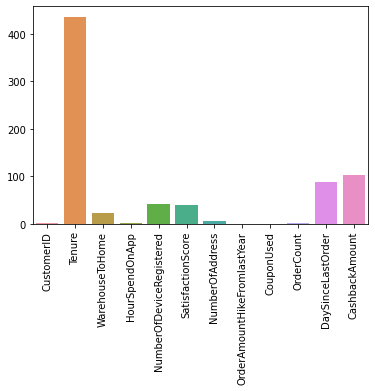

In [46]:
bar = sns.barplot(x = numerical_features,y=f_value)
plt.xticks(rotation=90)
plt.show()

> We can clearly see fetures like Tenure,CashbackAmount and DaySinceLastOrder has higher correlation with the target variable where as features like CouponUsed, OrderAmountHikeFromlastYear and CustomerID(we dont need to care about this, as this will be removed in the end) have very less correlation with the Target variable.

> During univariant data analysis we will check if these low correlated features add any value to our model.

**6.5.3) Feature - Target Correlation (Categorical & Categorical features)**

***6.5.3.1) Chi^2 Test***

> **Note**: that befor going to chi^2 Test we should encode the object datatyped categorical variables. Label Encoding is used for converting object datatyped categorical variables to ordinal variables.(this is only for this step while actual modelling we will be using one-hot encoding to encode the categorical features) 

In [53]:
df4 = train_df.copy()
df5 = cv_df.copy()
object_list = df4.select_dtypes(include = "object").columns
object_list

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [54]:
le = LabelEncoder()
df4[object_list] = df4[object_list].apply(le.fit_transform)
df5[object_list] = df5[object_list].apply(le.fit_transform)

In [55]:
skb = SelectKBest(score_func=chi2,k="all")
chi= skb.fit(df4[categorical_features],y_train)
chi_score = chi.scores_.round(1)
chi_score

array([2.997e+03, 3.700e+00, 1.470e+01, 2.000e-01, 1.600e+00, 4.210e+01,
       2.440e+01, 1.627e+02])

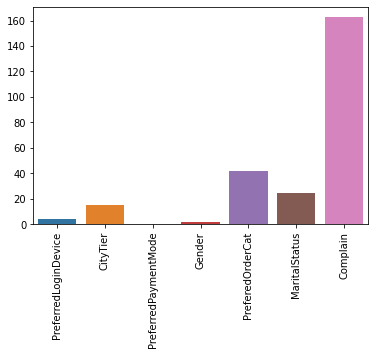

In [57]:
bar = sns.barplot(x = categorical_features[1:],y=chi_score[1:])
plt.xticks(rotation=90)
plt.show()

> We can clearly see fetures like Complain, PrefferedOrderCat and MaritalStatus has higher correlation with the target variable where as features like PreferredLoginDevice, PreferredPaymentMode and Gender have very less correlation with the Target variable.

> During univariant data analysis we will check if these low correlated features add any value to our model.

**6.5.4) Conclusion (Hypothesis Testing)**

1) Feature - Feature Correlation (Numberical features)

   > No two numerical features have high correlation 

2) Feature - Target Correlation (Numerical & Categorical features)

   > Features like CouponUsed, OrderAmountHikeFromlastYear have low correlation with the Target variable. Hence they will be modelled to check if they can beat the benchmark. If they failed to beat the bench mark then they will be removed before final modelling.

   > Fetures like Tenure,CashbackAmount and DaySinceLastOrder has higher correlation with the Target variable. Hence we will check if these features have any outliers, because as they have high correation with the target variable, outliers in these features will highly impact our models performance.

3) Feature - Target Correlation (Categorical & Categorical features)

   > Features like PreferredLoginDevice, PreferredPaymentMode and Gender have very less correlation with the Target variable. Hence they will be modelled to check if they can beat the benchmark. If they failed to beat the bench mark then they will be removed before final modelling.


### **6.6) Univarient Analysis**

In [58]:
def univarientmodel(feature_name, parameters):
  for i in parameters:
    sgd = SGDClassifier(loss='log',alpha = i)
    sgd.fit(np.array(df4[feature_name]).reshape(-1,1),y_train)
    sgd_score = sgd.predict_proba(np.array(df5[feature_name]).reshape(-1,1))
    print(f"log loss for alpha = {i} is {(log_loss(y_cv,sgd_score)).round(5)}")

**6.6.1) Numerical Features**

***1) CouponUsed***

In [59]:
parameters = {0.001,0.01,0.1,1,10,100}
univarientmodel("CouponUsed",parameters)

log loss for alpha = 0.1 is 0.45376
log loss for alpha = 1 is 0.46652
log loss for alpha = 100 is 0.63304
log loss for alpha = 10 is 0.63736
log loss for alpha = 0.01 is 0.45409
log loss for alpha = 0.001 is 0.45841


> alpha = 0.1 is the best value for hyper parameter, for which the model has recoded a log loss of 0.453. As the model beaten the benchmark this model is considered useful in predicting the target variable.

> NOTE: We are using log loss as a measure. Hence the log loss of the feature should be less than the random model to be accepted.

***2) OrderAmountHikeFromlastYear***

In [60]:
parameters = {0.001,0.01,0.1,1,10,100}
univarientmodel("OrderAmountHikeFromlastYear",parameters)

log loss for alpha = 0.1 is 0.45492
log loss for alpha = 1 is 0.45785
log loss for alpha = 100 is 0.53675
log loss for alpha = 10 is 0.46382
log loss for alpha = 0.01 is 0.4566
log loss for alpha = 0.001 is 0.45493


> alpha = 0.1 is the best value for hyper parameter, for which the model has recoded a log loss of 0.455. As the model beaten the benchmark this model is considered useful in predicting the target variable.

**6.6.2) Categorical Feartures**

***1) PreferredLoginDevice***

In [61]:
parameters = {0.001,0.01,0.1,1,10,100}
univarientmodel("PreferredLoginDevice",parameters)

log loss for alpha = 0.1 is 0.45514
log loss for alpha = 1 is 0.46133
log loss for alpha = 100 is 0.63372
log loss for alpha = 10 is 0.55037
log loss for alpha = 0.01 is 0.45699
log loss for alpha = 0.001 is 0.46034


> alpha = 0.1 is the best value for hyper parameter, for which the model has recoded a log loss of 0.455. As the model beaten the benchmark this model is considered useful in predicting the target variable.

***2) PreferredPaymentMode***

In [62]:
parameters = {0.001,0.01,0.1,1,10,100}
univarientmodel("PreferredPaymentMode",parameters)

log loss for alpha = 0.1 is 0.45376
log loss for alpha = 1 is 0.46109
log loss for alpha = 100 is 0.62504
log loss for alpha = 10 is 0.5278
log loss for alpha = 0.01 is 0.46013
log loss for alpha = 0.001 is 0.46248


> alpha = 0.1 is the best value for hyper parameter, for which the model has recoded a log loss of 0.454. As the model beaten the benchmark this model is considered useful in predicting the target variable.

***3) Gender***

In [ ]:
parameters = {0.001,0.01,0.1,1,10,100}
univarientmodel("Gender",parameters)

log loss for alpha = 0.1 is 0.45424
log loss for alpha = 1 is 0.45647
log loss for alpha = 100 is 0.63513
log loss for alpha = 10 is 0.65549
log loss for alpha = 0.01 is 0.45522
log loss for alpha = 0.001 is 0.45784


> alpha = 0.1 is the best value for hyper parameter, for which the model has recoded a log loss of 0.454. As the model beaten the benchmark this model is considered useful in predicting the target variable.

> Clearly all the features beaten the benchmark. Hence no feature will be removed

***6.6.3) Outliers***

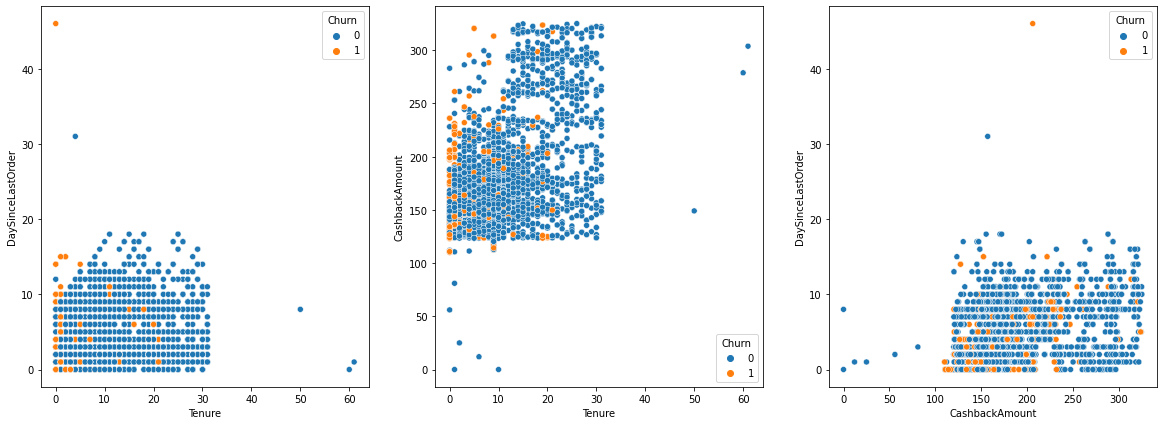

In [64]:
plt.subplots(figsize=(20,7))
plt.subplot(1,3,1)
sns.scatterplot(x = "Tenure", y= "DaySinceLastOrder", hue="Churn", data=train_df )
plt.subplot(1,3,2)
sns.scatterplot(x = "Tenure", y= "CashbackAmount", hue="Churn", data=train_df )
plt.subplot(1,3,3)
sns.scatterplot(x = "CashbackAmount", y= "DaySinceLastOrder", hue="Churn", data=train_df )
plt.show()

### **6.7) Model Preparation**

In [65]:
train_df = train_df.drop(["Churn","CustomerID"], axis = 1)
cv_df = cv_df.drop(["Churn","CustomerID"], axis = 1)
test_df = test_df.drop(["Churn","CustomerID"], axis = 1)
print(f"x-train shape: {train_df.shape} y-train shape: {y_train.shape} \n x-cv shape: {cv_df.shape} y-cv shape: {y_cv.shape} \n x-test shape: {test_df.shape} y-test shape: {y_test.shape} \n")

x-train shape: (3603, 18) y-train shape: (3603,) 
 x-cv shape: (901, 18) y-cv shape: (901,) 
 x-test shape: (1126, 18) y-test shape: (1126,) 



In [68]:
numerical_features

['CustomerID',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [69]:
numerical_features = numerical_features[1:]
numerical_features

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [70]:
categorical_features

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [97]:
categorical_features = categorical_features[1:]
categorical_features

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

> Now we will combain the train and cross validation data set. The main use of CV was for the univarient analysis as it is done now we will combain the train and cv dataset.

> For hyper parameter tuning we will be using k-fold cross validation.

In [88]:
trainx = pd.concat([train_df,cv_df])

In [89]:
trainy = pd.concat([y_train,y_cv])

In [91]:
trainx[3600:3615]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2958,19.0,Mobile Phone,1,27.0,Credit Card,Male,4.0,4,Grocery,2,Divorced,2,1,15.0,1.0,2.0,11.0,259.96
2447,9.0,Phone,3,14.0,Debit Card,Male,3.0,3,Mobile,1,Single,4,1,21.0,1.0,1.0,2.0,126.44
5518,5.0,Mobile Phone,3,17.0,Credit Card,Female,3.0,4,Laptop & Accessory,1,Married,4,1,12.0,2.0,2.0,5.0,190.83
5424,29.0,Mobile Phone,1,9.0,Credit Card,Male,3.0,5,Others,5,Married,10,0,15.0,2.0,2.0,1.0,315.38
3569,31.0,Mobile Phone,3,14.0,E wallet,Male,3.0,2,Laptop & Accessory,2,Married,2,1,19.0,1.0,2.0,10.0,177.20
824,12.0,Phone,1,24.0,Debit Card,Male,2.0,3,Laptop & Accessory,3,Single,1,0,11.0,0.0,1.0,7.0,145.34
5605,15.0,Mobile Phone,1,35.0,Debit Card,Female,3.0,5,Grocery,4,Married,2,0,24.0,2.0,2.0,11.0,260.70
3943,7.0,Computer,3,9.0,E wallet,Female,4.0,4,Laptop & Accessory,4,Single,10,0,16.0,1.0,2.0,8.0,176.47
5567,1.0,Mobile Phone,1,8.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,3,0,13.0,2.0,2.0,3.0,171.17
5511,22.0,Computer,1,29.0,Credit Card,Female,3.0,4,Grocery,1,Married,5,0,15.0,2.0,5.0,8.0,296.74


In [90]:
trainy[3600:3615]

2958    0
2447    0
5518    0
5424    0
3569    0
824     0
5605    0
3943    0
5567    0
5511    0
2376    1
1341    0
2540    0
1601    0
60      0
Name: Churn, dtype: int64

> We can clearly see the merge has properly taken place.

**6.7.1) Standerd Scaling**

In [92]:
scaling = StandardScaler()
trainx[numerical_features] = scaling.fit_transform(trainx[numerical_features])
test_df[numerical_features] = scaling.transform(test_df[numerical_features])

In [94]:
trainx.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2153,-0.981035,Phone,1,-0.192998,Debit Card,Female,0.100943,-0.666927,Mobile,-1.487137,Married,0.311688,0,1.755526,-0.383026,-0.681961,0.640125,-1.061373
134,-1.220862,Computer,1,2.284205,CC,Male,0.100943,0.305189,Mobile,0.677719,Single,-1.250740,0,-1.312295,-0.383026,-0.681961,-0.182449,-0.866387
1508,2.376549,Mobile Phone,1,1.694395,Debit Card,Male,-1.319827,-2.611160,Fashion,-1.487137,Married,-0.078919,1,0.082169,-0.383026,-0.681961,-0.182449,0.337880
596,1.537153,Mobile Phone,1,1.694395,Debit Card,Male,0.100943,-0.666927,Grocery,-0.043900,Divorced,-0.078919,1,0.639955,-0.920120,-0.334068,0.091742,1.254011
5163,-1.100948,Mobile Phone,1,-0.900770,COD,Male,0.100943,0.305189,Mobile Phone,-1.487137,Married,0.702295,0,-1.033402,-0.383026,-0.334068,-0.456641,-0.411756
545,-1.220862,Phone,1,-0.192998,Debit Card,Female,0.100943,-0.666927,Mobile,-0.043900,Single,-0.860133,0,0.918848,-0.383026,-0.681961,-1.279215,-1.100976
4907,0.218102,Mobile Phone,3,-0.664846,Debit Card,Male,0.100943,0.305189,Laptop & Accessory,-1.487137,Single,2.264722,1,-0.754509,0.154069,-0.334068,-1.005024,0.322119
2905,0.577843,Mobile Phone,3,-0.310960,Debit Card,Female,1.521712,0.305189,Fashion,-0.765518,Single,0.311688,1,0.918848,-0.383026,-0.334068,-1.005024,1.681970
906,-0.141639,Mobile Phone,3,-0.075036,E wallet,Male,-1.319827,-0.666927,Fashion,-1.487137,Married,0.311688,0,-1.312295,-0.920120,0.361720,-0.456641,0.470632
3876,-1.100948,Computer,3,0.396812,UPI,Male,0.100943,0.305189,Laptop & Accessory,-1.487137,Single,0.311688,1,2.592205,1.228258,1.405401,0.914317,-0.138573


In [95]:
print(trainx.shape,test_df.shape)

(4504, 18) (1126, 18)


**6.7.2) One-Hot encoding**

In [98]:
trainx[categorical_features].head()

,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
2153,Phone,1,Debit Card,Female,Mobile,Married,0
134,Computer,1,CC,Male,Mobile,Single,0
1508,Mobile Phone,1,Debit Card,Male,Fashion,Married,1
596,Mobile Phone,1,Debit Card,Male,Grocery,Divorced,1
5163,Mobile Phone,1,COD,Male,Mobile Phone,Married,0


In [101]:
one_hot = OneHotEncoder(handle_unknown='ignore')
trainx_one_hot = one_hot.fit_transform(trainx[categorical_features])
test_df_one_hot = one_hot.transform(test_df[categorical_features])

In [103]:
one_hot_features = one_hot.get_feature_names()
one_hot_features

array(['x0_Computer', 'x0_Mobile Phone', 'x0_Phone', 'x1_1', 'x1_2',
       'x1_3', 'x2_CC', 'x2_COD', 'x2_Cash on Delivery', 'x2_Credit Card',
       'x2_Debit Card', 'x2_E wallet', 'x2_UPI', 'x3_Female', 'x3_Male',
       'x4_Fashion', 'x4_Grocery', 'x4_Laptop & Accessory', 'x4_Mobile',
       'x4_Mobile Phone', 'x4_Others', 'x5_Divorced', 'x5_Married',
       'x5_Single', 'x6_0', 'x6_1'], dtype=object)

In [104]:
one_hot_train_df = pd.DataFrame.sparse.from_spmatrix(trainx_one_hot, columns=one_hot_features)
one_hot_test_df = pd.DataFrame.sparse.from_spmatrix(test_df_one_hot, columns=one_hot_features)

In [106]:
print(one_hot_train_df.shape)
one_hot_train_df.head(10)

(4504, 26)


,x0_Computer,x0_Mobile Phone,x0_Phone,x1_1,x1_2,x1_3,x2_CC,x2_COD,x2_Cash on Delivery,x2_Credit Card,...,x4_Grocery,x4_Laptop & Accessory,x4_Mobile,x4_Mobile Phone,x4_Others,x5_Divorced,x5_Married,x5_Single,x6_0,x6_1
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


> Now we will drop the categorical features from trainx and test_df dataframes and add these encoded features to them. But before that we should replace the indices of the encoded dataframe with the orginal dataframe, else the merge will not be as we expected.

In [112]:
indices_train = trainx.index

In [113]:
indices_test = test_df.index

In [114]:
one_hot_train_df.set_index(indices_train)

,x0_Computer,x0_Mobile Phone,x0_Phone,x1_1,x1_2,x1_3,x2_CC,x2_COD,x2_Cash on Delivery,x2_Credit Card,...,x4_Grocery,x4_Laptop & Accessory,x4_Mobile,x4_Mobile Phone,x4_Others,x5_Divorced,x5_Married,x5_Single,x6_0,x6_1
2153,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
134,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1508,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
596,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5163,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1973,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1569,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [115]:
one_hot_test_df.set_index(indices_test)

,x0_Computer,x0_Mobile Phone,x0_Phone,x1_1,x1_2,x1_3,x2_CC,x2_COD,x2_Cash on Delivery,x2_Credit Card,...,x4_Grocery,x4_Laptop & Accessory,x4_Mobile,x4_Mobile Phone,x4_Others,x5_Divorced,x5_Married,x5_Single,x6_0,x6_1
3984,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3602,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4359,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
254,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3974,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1432,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3060,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [117]:
# Droping the categorical features from the trainx and test_df data set.
trainx = trainx.drop(categorical_features, axis=1)
test_df = test_df.drop(categorical_features, axis=1)
print(trainx.shape, test_df.shape)

(4504, 11) (1126, 11)


In [121]:
one_hot_train_df.shape

(4504, 26)

In [119]:
# Now we can merge the encoded and orginal dataset to obtain our final dataset.

train_x = pd.concat([trainx,one_hot_train_df], axis=1)
test_x = pd.concat([test_df, one_hot_test_df], axis=1)

train_y = trainy
test_y = y_test

In [125]:
res = trainx.join(one_hot_train_df)

In [133]:
trainx

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2153,-0.981035,-0.192998,0.100943,-0.666927,-1.487137,0.311688,1.755526,-0.383026,-0.681961,0.640125,-1.061373
134,-1.220862,2.284205,0.100943,0.305189,0.677719,-1.250740,-1.312295,-0.383026,-0.681961,-0.182449,-0.866387
1508,2.376549,1.694395,-1.319827,-2.611160,-1.487137,-0.078919,0.082169,-0.383026,-0.681961,-0.182449,0.337880
596,1.537153,1.694395,0.100943,-0.666927,-0.043900,-0.078919,0.639955,-0.920120,-0.334068,0.091742,1.254011
5163,-1.100948,-0.900770,0.100943,0.305189,-1.487137,0.702295,-1.033402,-0.383026,-0.334068,-0.456641,-0.411756
...,...,...,...,...,...,...,...,...,...,...,...
4766,-0.261552,0.868660,1.521712,1.277306,-1.487137,-0.469526,0.361062,0.154069,-0.334068,-0.182449,-0.548347
1973,-0.021725,0.750698,0.100943,0.305189,-0.043900,0.311688,0.918848,-0.383026,-0.681961,-1.279215,-0.289511
1569,-0.741207,-1.136694,-1.319827,1.277306,-0.043900,-1.250740,-1.033402,-0.920120,-0.681961,-0.182449,-0.691404
5122,1.776980,-0.428922,0.100943,0.305189,0.677719,-0.469526,-1.033402,-0.383026,-0.334068,1.736891,1.769865


In [129]:
res

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,x4_Grocery,x4_Laptop & Accessory,x4_Mobile,x4_Mobile Phone,x4_Others,x5_Divorced,x5_Married,x5_Single,x6_0,x6_1
2153,-0.981035,-0.192998,0.100943,-0.666927,-1.487137,0.311688,1.755526,-0.383026,-0.681961,0.640125,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,-1.220862,2.284205,0.100943,0.305189,0.677719,-1.250740,-1.312295,-0.383026,-0.681961,-0.182449,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1508,2.376549,1.694395,-1.319827,-2.611160,-1.487137,-0.078919,0.082169,-0.383026,-0.681961,-0.182449,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
596,1.537153,1.694395,0.100943,-0.666927,-0.043900,-0.078919,0.639955,-0.920120,-0.334068,0.091742,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5163,-1.100948,-0.900770,0.100943,0.305189,-1.487137,0.702295,-1.033402,-0.383026,-0.334068,-0.456641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,-0.261552,0.868660,1.521712,1.277306,-1.487137,-0.469526,0.361062,0.154069,-0.334068,-0.182449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,-0.021725,0.750698,0.100943,0.305189,-0.043900,0.311688,0.918848,-0.383026,-0.681961,-1.279215,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1569,-0.741207,-1.136694,-1.319827,1.277306,-0.043900,-1.250740,-1.033402,-0.920120,-0.681961,-0.182449,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5122,1.776980,-0.428922,0.100943,0.305189,0.677719,-0.469526,-1.033402,-0.383026,-0.334068,1.736891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
print(f"x-train shape: {train_x.shape} y-train shape: {train_y.shape} \n  x-test shape: {test_x.shape} y-test shape: {test_y.shape} \n")

x-train shape: (5392, 37) y-train shape: (4504,) 
  x-test shape: (2019, 37) y-test shape: (1126,) 

